In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from collections import Counter
import stylecloud

In [3]:
style.use("seaborn")

In [4]:
url = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest_deprecated.csv"

In [5]:
df = pd.read_csv(url)
df

C:\Users\caisy\AppData\Local\Temp/ipykernel_21212/2348912207.py:1: DtypeWarning: Columns (3,8,10,11,12,14,16,18,19,20,21,22,23,24,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
0,N1,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-04-29,2022-05-06,...,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
1,N2,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-05-05,2022-05-12,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
2,N3,confirmed,London,London,England,GBR,NaN,NaN,2022-04-30,2022-05-13,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
3,N4,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
4,N5,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69590,E3814,confirmed,Anambra,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-08-28,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-16,NaN,2022-09-16
69591,E3815,suspected,Enugu,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-16,NaN,2022-09-16
69592,E3816,suspected,Kano,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-16,NaN,2022-09-16
69593,E3817,confirmed,Oyo,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-08-28,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-16,NaN,2022-09-16


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69595 entries, 0 to 69594
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       69595 non-null  object 
 1   Status                   69595 non-null  object 
 2   Location                 52387 non-null  object 
 3   City                     1383 non-null   object 
 4   Country                  69595 non-null  object 
 5   Country_ISO3             69595 non-null  object 
 6   Age                      3021 non-null   object 
 7   Gender                   2475 non-null   object 
 8   Date_onset               77 non-null     object 
 9   Date_confirmation        65546 non-null  object 
 10  Symptoms                 220 non-null    object 
 11  Hospitalised (Y/N/NA)    354 non-null    object 
 12  Date_hospitalisation     35 non-null     object 
 13  Isolated (Y/N/NA)        493 non-null    object 
 14  Date_isolation        

In [6]:
df.to_csv("data.csv")

In [7]:
df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age',
       'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)',
       'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID',
       'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V',
       'Source_VI', 'Source_VII', 'Date_entry', 'Date_death',
       'Date_last_modified'],
      dtype='object')

In [8]:
print(df.Country.unique())
print("Number of countries: {}".format(len(df.Country.unique())))

['England' 'Portugal' 'Spain' 'United States' 'Canada' 'Sweden' 'Italy'
 'France' 'Belgium' 'Australia' 'Germany' 'Netherlands' 'Israel'
 'Switzerland' 'Greece' 'Austria' 'Argentina' 'Denmark' 'Morocco'
 'Slovenia' 'Scotland' 'Czech Republic' 'United Arab Emirates' 'Finland'
 'Wales' 'Northern Ireland' 'Sudan' 'Bolivia' 'Iran' 'Ecuador' 'Malta'
 'Ireland' 'Mexico' 'Pakistan' 'French Guiana' 'Thailand' 'Peru' 'Brazil'
 'Malaysia' 'Hungary' 'Norway' 'Paraguay' 'Costa Rica' 'Gibraltar'
 'Mauritius' 'Haiti' 'Uruguay' 'Latvia' 'Cayman Islands' 'Kosovo' 'Turkey'
 'Bahamas' 'Ghana' 'India' 'Iceland' 'Poland' 'Bangladesh' 'Uganda'
 'Cambodia' 'Malawi' 'Venezuela' 'Romania' 'Georgia' 'Slovakia'
 'Luxembourg' 'Nepal' 'Chile' 'Serbia' 'Lebanon' 'South Korea' 'Singapore'
 'South Africa' 'Taiwan' 'Colombia' 'Croatia' 'Bulgaria' 'Somalia'
 'Zambia' 'Fiji' 'Benin' 'Estonia' 'Puerto Rico' 'Panama'
 'Dominican Republic' 'Jamaica' 'New Zealand' 'Russia'
 'Bosnia And Herzegovina' 'Saudi Arabia' 'Martiniq

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'German

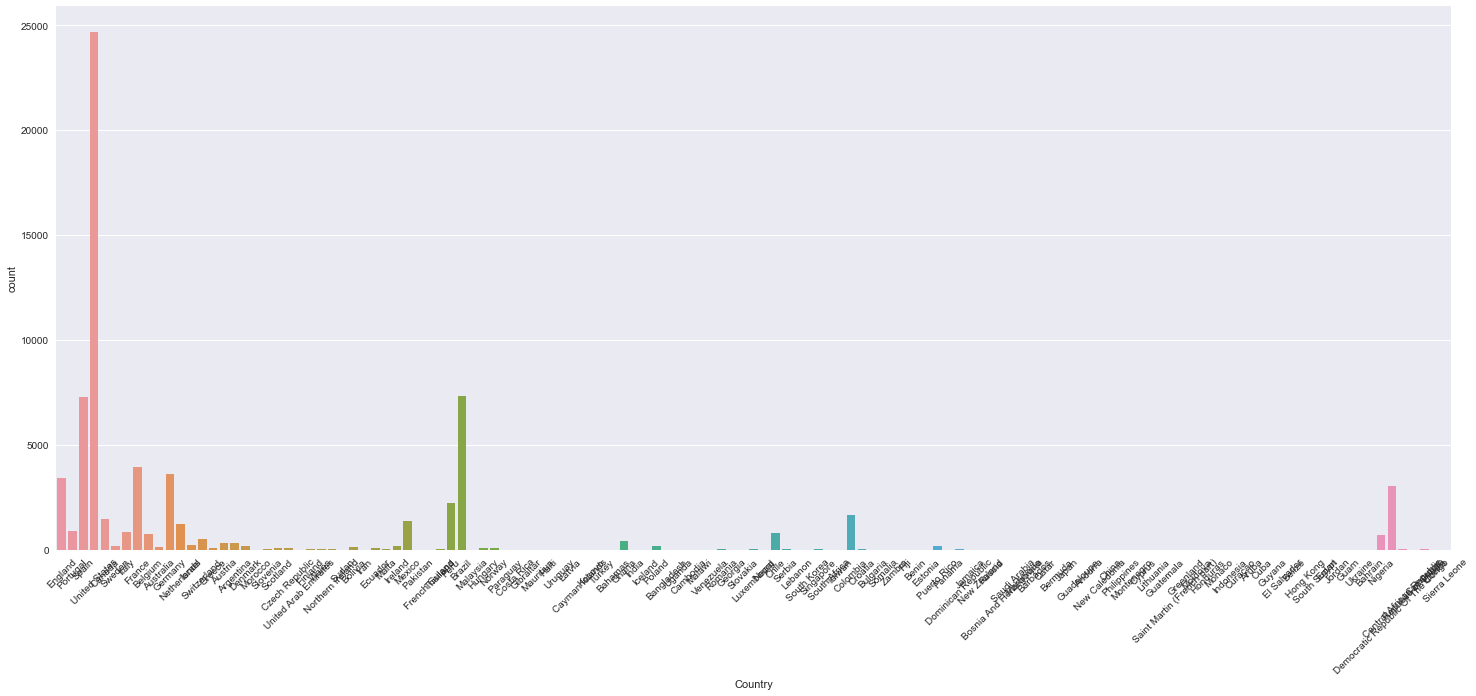

In [9]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Country", data = df)
plt.xticks(rotation = 45)

In [31]:
cases_per_country = df.groupby("Country")["Status"].value_counts().nlargest(n = 10)
cases_per_country

Country                           Status   
United States                     confirmed    24403
Brazil                            confirmed     7300
Spain                             confirmed     7083
France                            confirmed     3934
Germany                           confirmed     3590
England                           confirmed     3412
Democratic Republic Of The Congo  suspected     2852
Peru                              confirmed     2251
Colombia                          confirmed     1653
Canada                            confirmed     1388
Name: Status, dtype: int64

<AxesSubplot:ylabel='Country'>

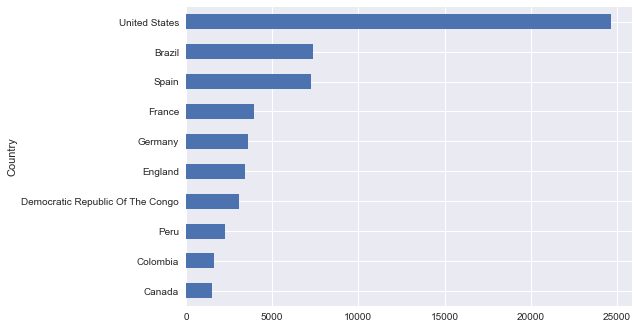

In [11]:
cases_per_country = df.groupby("Country", dropna = False)["Status"].count().nlargest(n = 10).loc[::-1]
cases_per_country.plot(kind = "barh")

In [12]:
df[df.Country == "England"].groupby("City", dropna = False)["Status"].count()
# Many unknown cities have dicovered potential patients 

City
London           7
Newcastle        1
South East       1
NaN           3403
Name: Status, dtype: int64

In [13]:
df.City.value_counts()

Toronto         552
Madrid          121
Montreal         59
Berlin           48
Ottawa           44
               ... 
Helsinki          1
Santa Cruz        1
Coesfeld          1
Günzburg          1
Southwestern      1
Name: City, Length: 197, dtype: int64

In [14]:
plt.figure(figsize= (20,20))
df.groupby("City")["Status"].count().nlargest(n = 10)

City
Toronto          552
Madrid           121
Montreal          59
Berlin            48
Ottawa            44
Peel              21
Lisbon            20
San Francisco     20
Hamilton          18
Gran Canaria      16
Name: Status, dtype: int64

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:xlabel='Status', ylabel='count'>

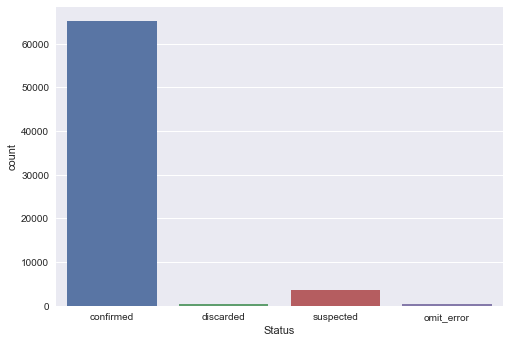

In [15]:
sns.countplot(x = "Status", data = df)

In [16]:
df.groupby(["Status", "Country"]).count()

ID  Location  City  Country_ISO3  Age  Gender  \
Status    Country                                                        
confirmed Andorra         4         0     0             4    0       0   
          Argentina     326       121     4           326   65      42   
          Aruba           3         0     0             3    0       0   
          Australia     132       132     7           132    7       8   
          Austria       304         2     9           304    8       7   
...                     ...       ...   ...           ...  ...     ...   
suspected Sierra Leone    2         0     0             2    0       0   
          Somalia         3         3     3             3    0       0   
          Sudan           1         0     0             1    0       0   
          Uganda          6         6     0             6    2       1   
          Zambia          1         0     0             1    1       1   

                        Date_onset  Date_confirmation  Symptoms  \
Status    Country                                                 
confirmed Andorra                0                  4         0   
          Argentina             12                326         8   
          Aruba                  0                  3         0   
          Australia              1                132         1   
          Austria                0                304         2   
...                            ...                ...       ...   
suspected Sierra Leone           0                  0         0   
          Somalia                0                  0         0   
          Sudan                  0                  0         0   
          Uganda                 0                  0         0   
          Zambia                 0                  0         0   

                        Hospitalised (Y/N/NA)  ...  Source  Source_II  \
Status    Country                              ...                      
confirmed Andorra                           0  ...       4          3   
          Argentina                         0  ...     326        117   
          Aruba                             0  ...       3          1   
          Australia                         5  ...     132          6   
          Austria                           9  ...     304         14   
...                                       ...  ...     ...        ...   
suspected Sierra Leone                      0  ...       2          0   
          Somalia                           3  ...       3          0   
          Sudan                             0  ...       1          1   
          Uganda                            0  ...       6          0   
          Zambia                            0  ...       1          0   

                        Source_III  Source_IV  Source_V  Source_VI  \
Status    Country                                                    
confirmed Andorra                2          0         0          0   
          Argentina              8          5         0          0   
          Aruba                  0          0         0          0   
          Australia              2          0         0          0   
          Austria                0          0         0          0   
...                            ...        ...       ...        ...   
suspected Sierra Leone           0          0         0          0   
          Somalia                0          0         0          0   
          Sudan                  0          0         0          0   
          Uganda                 0          0         0          0   
          Zambia                 0          0         0          0   

                        Source_VII  Date_entry  Date_death  Date_last_modified  
Status    Country                                                               
confirmed Andorra                0           4           0                   4  
          Argentina              0         326           0                 326  
     

In [101]:
travel_to_destination = df.loc[(df["Travel_history (Y/N/NA)"] == "Y") & (df["Status"] == "confirmed") , "Travel_history_country"].value_counts().nlargest(10).loc[::-1]
travel_to_destination

Mexico            2
Canada            2
Nigeria           3
Portugal          4
USA               5
United States     5
England           6
Brazil            6
Germany           6
Spain            18
Name: Travel_history_country, dtype: int64

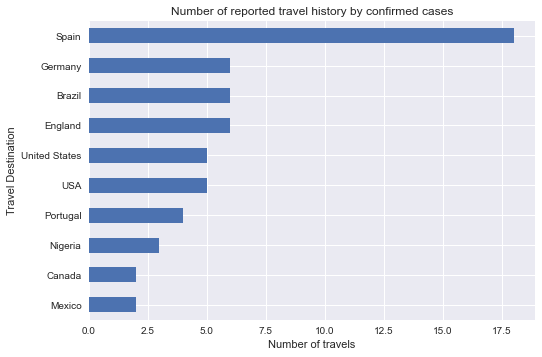

In [105]:
travel_to_destination.plot(kind = "barh")
plt.ylabel("Travel Destination")
plt.xlabel("Number of travels")
plt.title("Number of reported travel history by confirmed cases")
plt.savefig("travel", bbox_inches='tight')

In [17]:
top_10_countries = list(df.Country.value_counts().nlargest(n = 10).index)
top_10_countries

['United States',
 'Brazil',
 'Spain',
 'France',
 'Germany',
 'England',
 'Democratic Republic Of The Congo',
 'Peru',
 'Colombia',
 'Canada']

In [18]:
top_10_countries_df = df[df.Country.isin(top_10_countries)]

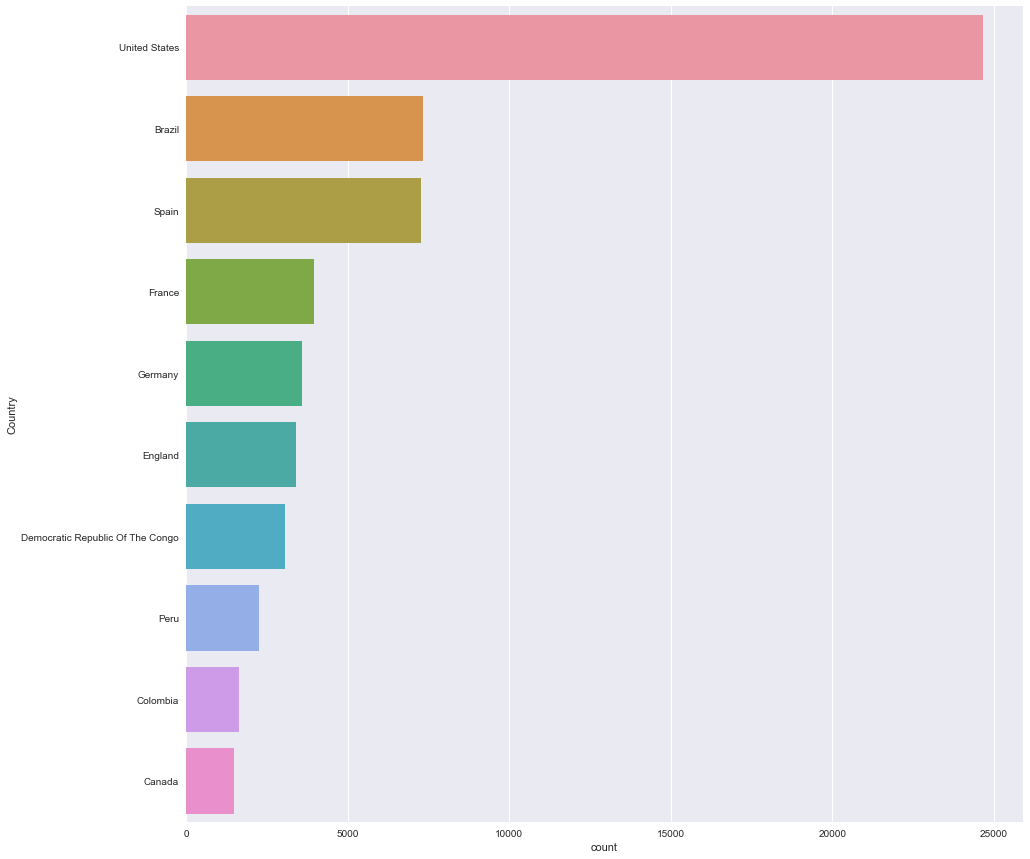

In [37]:
plt.figure(figsize = (15,15))
sns.countplot(y = "Country", data = top_10_countries_df, order = top_10_countries)
plt.savefig("top_10_countries", bbox_inches='tight')

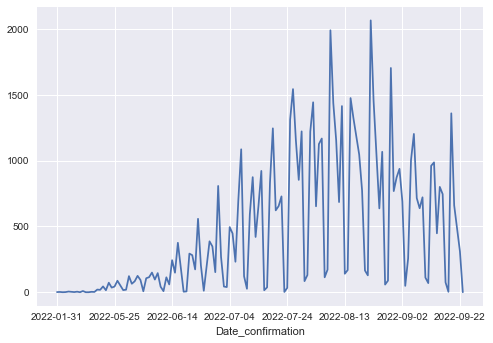

In [38]:
pd.to_datetime(df["Date_confirmation"])
df.groupby("Date_confirmation")["Status"].count().plot(kind = "line")
plt.savefig("number_of_confirmations_per_day", bbox_inches='tight')

In [113]:
df.Symptoms.fillna("missing").value_counts()[1:]

genital ulcer lesions                                 30
oral and genital ulcers, fever                        17
ulcerative lesions                                    16
Rash                                                  13
skin lesions                                           7
                                                      ..
Spots on skin, vesicuated lesions, skin scabs          1
papules, itching, fever, muscle and joint pain         1
papules, itching                                       1
headache, muscle pain, back pain, vasicular rashes     1
Skin lesions, fever, sore throat                       1
Name: Symptoms, Length: 112, dtype: int64

<AxesSubplot:>

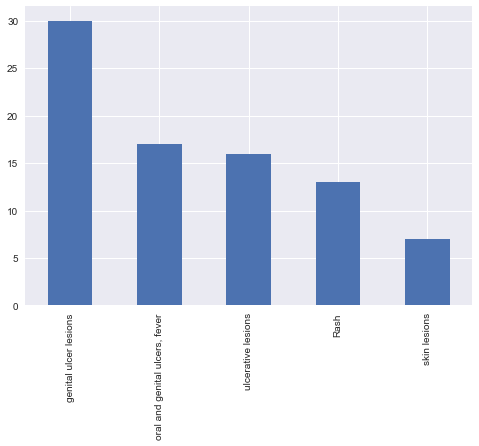

In [22]:
df.Symptoms.fillna("missing").value_counts()[1:].nlargest(n = 5).plot(kind = "bar")

In [126]:
doc = " ".join(df.Symptoms.fillna(""))

In [127]:
len(doc)

75054

In [143]:
Counter(word for word in doc.split(" ") if word != "").most_common(n = 10)

[('lesions', 86),
 ('genital', 54),
 ('skin', 50),
 ('fever,', 43),
 ('fever', 34),
 ('ulcer', 30),
 ('and', 27),
 ('rash', 25),
 ('ulcerative', 21),
 ('headache,', 21)]

In [124]:
stylecloud.gen_stylecloud(text = doc, size = 655, icon_name = "fas fa-circle", collocations= False,
                         palette = "cartocolors.qualitative.Pastel_5", background_color = "white", )